In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

circuits = pd.read_csv("data_raw/circuits.csv")

circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [3]:
Results= pd.read_csv("data_raw/results.csv")
Results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


In [4]:
Drivers=pd.read_csv("data_raw/drivers.csv")
Drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [5]:
lap_times=pd.read_csv("data_raw/lap_times.csv")
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
538116,1096,822,53,16,1:32.998,92998
538117,1096,822,54,16,1:32.995,92995
538118,1096,822,55,16,1:31.236,91236
538119,1096,822,56,15,1:30.566,90566


In [6]:
constructors=pd.read_csv("data_raw/constructors.csv")
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [41]:
races= pd.read_csv("data_raw/races.csv")

races


races2 = (races.query("year >= 2013"))

races2     

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
878,880,2013,1,1,Australian Grand Prix,2013-03-17,06:00:00,http://en.wikipedia.org/wiki/2013_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
879,881,2013,2,2,Malaysian Grand Prix,2013-03-24,08:00:00,http://en.wikipedia.org/wiki/2013_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
880,882,2013,3,17,Chinese Grand Prix,2013-04-14,07:00:00,http://en.wikipedia.org/wiki/2013_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
881,883,2013,4,3,Bahrain Grand Prix,2013-04-21,12:00:00,http://en.wikipedia.org/wiki/2013_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
882,884,2013,5,4,Spanish Grand Prix,2013-05-12,12:00:00,http://en.wikipedia.org/wiki/2013_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [42]:


constructor_merge = pd.merge(Results[['raceId', 'driverId', 'constructorId','points']],
                       constructors[["constructorId","constructorRef", "name"]],
                       on = "constructorId",
                       how = "left")



constructor_merge




,raceId,driverId,constructorId,points,constructorRef,name
0,18,1,1,10.0,mclaren,McLaren
1,18,2,2,8.0,bmw_sauber,BMW Sauber
2,18,3,3,6.0,williams,Williams
3,18,4,4,5.0,renault,Renault
4,18,5,1,4.0,mclaren,McLaren
...,...,...,...,...,...,...
25835,1096,854,210,0.0,haas,Haas F1 Team
25836,1096,825,210,0.0,haas,Haas F1 Team
25837,1096,1,131,0.0,mercedes,Mercedes
25838,1096,849,3,0.0,williams,Williams


In [43]:
raceid_merge = pd.merge(constructor_merge[['raceId', 'constructorId','points','constructorRef','name']],
                       lap_times[["raceId","time"]],
                       on = "raceId",
                       how = "left")










In [44]:
races_merge = pd.merge(raceid_merge[['raceId', 'constructorId','points','constructorRef','name','time']],
                       races2[["raceId","circuitId","name","year"]],
                       on = "raceId",
                       how = "left")

races_merge



main_data = races_merge.rename(columns = {"name_x":"name_brand",
                                                                  "name_y":"name_circuit"})
main_data




,raceId,constructorId,points,constructorRef,name_brand,time,circuitId,name_circuit,year
0,18,1,10.0,mclaren,McLaren,2:09.474,NaN,NaN,NaN
1,18,1,10.0,mclaren,McLaren,2:31.479,NaN,NaN,NaN
2,18,1,10.0,mclaren,McLaren,1:30.841,NaN,NaN,NaN
3,18,1,10.0,mclaren,McLaren,1:30.806,NaN,NaN,NaN
4,18,1,10.0,mclaren,McLaren,1:31.395,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11479397,1096,214,0.0,alpine,Alpine F1 Team,1:32.998,24.0,Abu Dhabi Grand Prix,2022.0
11479398,1096,214,0.0,alpine,Alpine F1 Team,1:32.995,24.0,Abu Dhabi Grand Prix,2022.0
11479399,1096,214,0.0,alpine,Alpine F1 Team,1:31.236,24.0,Abu Dhabi Grand Prix,2022.0
11479400,1096,214,0.0,alpine,Alpine F1 Team,1:30.566,24.0,Abu Dhabi Grand Prix,2022.0


In [45]:
main_data2 = (main_data.query("year >= 2015"))
main_data2

,raceId,constructorId,points,constructorRef,name_brand,time,circuitId,name_circuit,year
7904749,926,131,25.0,mercedes,Mercedes,1:31.332,1.0,Australian Grand Prix,2015.0
7904750,926,131,25.0,mercedes,Mercedes,1:31.092,1.0,Australian Grand Prix,2015.0
7904751,926,131,25.0,mercedes,Mercedes,1:31.319,1.0,Australian Grand Prix,2015.0
7904752,926,131,25.0,mercedes,Mercedes,1:31.231,1.0,Australian Grand Prix,2015.0
7904753,926,131,25.0,mercedes,Mercedes,1:32.243,1.0,Australian Grand Prix,2015.0
...,...,...,...,...,...,...,...,...,...
11479397,1096,214,0.0,alpine,Alpine F1 Team,1:32.998,24.0,Abu Dhabi Grand Prix,2022.0
11479398,1096,214,0.0,alpine,Alpine F1 Team,1:32.995,24.0,Abu Dhabi Grand Prix,2022.0
11479399,1096,214,0.0,alpine,Alpine F1 Team,1:31.236,24.0,Abu Dhabi Grand Prix,2022.0
11479400,1096,214,0.0,alpine,Alpine F1 Team,1:30.566,24.0,Abu Dhabi Grand Prix,2022.0


In [46]:

teamrace_agg = (main_data2.groupby(["constructorId","name_circuit"])
                        .agg(mean_points = ('points','mean')))
teamrace_agg






mean_points
constructorId name_circuit                            
1             70th Anniversary Grand Prix     1.000000
              Abu Dhabi Grand Prix            2.759554
              Australian Grand Prix           2.641310
              Austrian Grand Prix             5.011667
              Azerbaijan Grand Prix           3.880234
...                                                ...
214           Spanish Grand Prix              2.490307
              Styrian Grand Prix              1.000000
              São Paulo Grand Prix            3.000000
              Turkish Grand Prix              0.500000
              United States Grand Prix        1.460177

[514 rows x 1 columns]

In [47]:
teamrace_agg.groupby('constructorId').apply(lambda mean_points : mean_points.sort_values(by = 'mean_points', ascending = False).head(5).reset_index(drop = True))

mean_points
constructorId               
1             0     7.995418
              1     6.500000
              2     5.729183
              3     5.178138
              4     5.011667
...                      ...
214           0    12.500000
              1     9.434829
              2     9.000000
              3     7.839506
              4     7.000000

[85 rows x 1 columns]

In [48]:
maxofmean_points=(teamrace_agg.groupby(["constructorId"])
 .agg(max_points=('mean_points','max')))


maxofmean_points




,max_points
constructorId,
1,7.995418
3,5.572189
4,14.000000
5,3.426344
6,16.500000
9,20.000000
10,8.500000
15,2.267868
51,6.237012


In [49]:
teamrace_agg.query("mean_points >= 10")

mean_points
constructorId name_circuit                         
4             Sakhir Grand Prix           14.000000
6             Abu Dhabi Grand Prix        10.442133
              Australian Grand Prix       13.035922
              Austrian Grand Prix         11.066640
              Bahrain Grand Prix          11.969812
...                                             ...
131           Tuscan Grand Prix           22.000000
              United States Grand Prix    17.496931
211           Sakhir Grand Prix           20.000000
              Turkish Grand Prix          10.000000
214           Qatar Grand Prix            12.500000

[83 rows x 1 columns]

In [50]:


top5_mean_points_constructors = (teamrace_agg.groupby('constructorId').apply(lambda x: x.sort_values(by='mean_points', ascending=False).head(5)).reset_index(drop=True))

top5_mean_points_constructors



,mean_points
0,7.995418
1,6.500000
2,5.729183
3,5.178138
4,5.011667
...,...
80,12.500000
81,9.434829
82,9.000000
83,7.839506


In [51]:
bottom5_mean_points_constructors = (teamrace_agg.groupby('constructorId').apply(lambda x: x.sort_values(by='mean_points', ascending=False).tail(5)).reset_index(drop=True))

bottom5_mean_points_constructors


,mean_points
0,0.500000
1,0.470807
2,0.000000
3,0.000000
4,0.000000
...,...
80,1.196179
81,1.000000
82,0.747672
83,0.500000


In [52]:
teamrace_agg.query("mean_points >= 10")

mean_points
constructorId name_circuit                         
4             Sakhir Grand Prix           14.000000
6             Abu Dhabi Grand Prix        10.442133
              Australian Grand Prix       13.035922
              Austrian Grand Prix         11.066640
              Bahrain Grand Prix          11.969812
...                                             ...
131           Tuscan Grand Prix           22.000000
              United States Grand Prix    17.496931
211           Sakhir Grand Prix           20.000000
              Turkish Grand Prix          10.000000
214           Qatar Grand Prix            12.500000

[83 rows x 1 columns]

In [53]:



Results["fastestLapSpeed"].str.isnumeric()
subset = Results.query("fastestLapSpeed.str.isnumeric() == False")




AttributeError: Can only use .str accessor with string values!

In [54]:
avg_speed_of_race=(Results.groupby("raceId")
.agg(mean_max_speed=('fastestLapSpeed','mean')))




In [56]:
main_data2 = (main_data.query("year >= 2013"))
main_data2

,raceId,constructorId,points,constructorRef,name_brand,time,circuitId,name_circuit,year
6952535,880,208,25.0,lotus_f1,Lotus F1,1:39.646,1.0,Australian Grand Prix,2013.0
6952536,880,208,25.0,lotus_f1,Lotus F1,1:33.106,1.0,Australian Grand Prix,2013.0
6952537,880,208,25.0,lotus_f1,Lotus F1,1:33.550,1.0,Australian Grand Prix,2013.0
6952538,880,208,25.0,lotus_f1,Lotus F1,1:34.374,1.0,Australian Grand Prix,2013.0
6952539,880,208,25.0,lotus_f1,Lotus F1,1:34.496,1.0,Australian Grand Prix,2013.0
...,...,...,...,...,...,...,...,...,...
11479397,1096,214,0.0,alpine,Alpine F1 Team,1:32.998,24.0,Abu Dhabi Grand Prix,2022.0
11479398,1096,214,0.0,alpine,Alpine F1 Team,1:32.995,24.0,Abu Dhabi Grand Prix,2022.0
11479399,1096,214,0.0,alpine,Alpine F1 Team,1:31.236,24.0,Abu Dhabi Grand Prix,2022.0
11479400,1096,214,0.0,alpine,Alpine F1 Team,1:30.566,24.0,Abu Dhabi Grand Prix,2022.0


In [57]:
driverid_merge = pd.merge(constructor_merge[['raceId', 'driverId','points','constructorRef','name']],
                       lap_times[["raceId","time"]],
                       on = "raceId",
                       how = "left")



drivers_merge = pd.merge(driverid_merge[['raceId', 'driverId','points','constructorRef','name','time']],
                       races2[["raceId","circuitId","name","year"]],
                       on = "raceId",
                       how = "left")

drivers_merge



main_data_drivers = drivers_merge.rename(columns = {"name_x":"name_brand",
                                                                  "name_y":"name_circuit"})
main_data_drivers



main_data_drivers2 = (main_data_drivers.query("year >= 2015"))
main_data_drivers2



teamrace_agg_drivers = (main_data_drivers2.groupby(["driverId","name_circuit"])
                        .agg(mean_points = ('points','mean')))
teamrace_agg_drivers






mean_points
driverId name_circuit                            
1        70th Anniversary Grand Prix    19.000000
         Abu Dhabi Grand Prix           17.877108
         Australian Grand Prix          17.765628
         Austrian Grand Prix            13.095412
         Azerbaijan Grand Prix          12.827330
...                                           ...
855      Saudi Arabian Grand Prix        0.000000
         Singapore Grand Prix            0.000000
         Spanish Grand Prix              0.000000
         United States Grand Prix        0.000000
856      Italian Grand Prix              2.000000

[1189 rows x 1 columns]

In [58]:

top5_mean_points_drivers = (teamrace_agg_drivers.groupby('driverId').apply(lambda x: x.sort_values(by='mean_points', ascending=False).head(1)).reset_index(drop=True))

top5_mean_points_drivers

,mean_points
0,26.000000
1,25.000000
2,15.000000
3,12.000000
4,1.000000
5,9.820436
6,4.622454
7,18.000000
8,4.418511
9,6.000000


In [60]:
circuits_details=pd.read_csv("data_raw/circuits_details1.csv")

circuits_details


circuits_merge = pd.merge(circuits_details[['location', 'length', 'turns']],
                       circuits[["name","location"]],
                       on = "location",
                       how = "left")

circuits_merge_2 = circuits_merge.rename(columns = {"name":"name_circuit"})



circuits_merge_2


turns_ranked=circuits_merge_2.sort_values(by = "turns", ascending = False)

length_ranked=circuits_merge_2.sort_values(by = "length", ascending = False)


turns_ranked

,location,length,turns,name_circuit
20,Jeddah,6.174,27,Jeddah Corniche Circuit
24,Marina Bay,4.940,23,Marina Bay Street Circuit
8,Baku,6.003,20,Baku City Circuit
12,Spa,7.004,20,Circuit de Spa-Francorchamps
14,Austin,5.513,20,Circuit of the Americas
11,Monte-Carlo,3.337,19,Circuit de Monaco
32,Suzuka,5.807,18,Suzuka Circuit
30,Silverstone,5.891,18,Silverstone Circuit
25,Miami,5.412,18,Miami International Autodrome
21,Yeongam County,5.615,18,Korean International Circuit


In [61]:
top5_mean_points_constructors_with_turns_and_length=pd.merge(top5_mean_points_constructors[['constructorId', 'name_circuit', 'mean_points']],
                       circuits_merge_2[["length","turns","name_circuit"]],
                       on = "name_circuit",
                       how = "left")

top5_mean_points_constructors_with_turns_and_length

KeyError: "['constructorId', 'name_circuit'] not in index"

In [62]:
circuits = pd.read_csv("data_raw/circuits.csv")

circuits

races= pd.read_csv("data_raw/races.csv")

races


races_post_2015 = (races.query("year >= 2015"))
races_post_2015


races_with_circuits=pd.merge(circuits[['circuitId', 'name', 'location']],
                       races_post_2015[["year","circuitId","raceId"]],
                       on = "circuitId",
                       how = "left")

results_with_circuits_merge = pd.merge(Results[['raceId','constructorId','points']],
                       races_with_circuits[["circuitId","name", "location","raceId"]],
                       on = "raceId",
                       how = "left")

In [63]:
results_with_circuits_merge

,raceId,constructorId,points,circuitId,name,location
0,18,1,10.0,NaN,NaN,NaN
1,18,2,8.0,NaN,NaN,NaN
2,18,3,6.0,NaN,NaN,NaN
3,18,4,5.0,NaN,NaN,NaN
4,18,1,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...
25835,1096,210,0.0,24.0,Yas Marina Circuit,Abu Dhabi
25836,1096,210,0.0,24.0,Yas Marina Circuit,Abu Dhabi
25837,1096,131,0.0,24.0,Yas Marina Circuit,Abu Dhabi
25838,1096,3,0.0,24.0,Yas Marina Circuit,Abu Dhabi


In [64]:
constructor_agg = (results_with_circuits_merge.groupby(["constructorId","name"])
                        .agg(mean_points = ('points','mean')))
constructor_agg



mean_points
constructorId name                                             
1             Albert Park Grand Prix Circuit           2.500000
              Autodromo Enzo e Dino Ferrari            8.000000
              Autodromo Internazionale del Mugello     4.000000
              Autodromo Nazionale di Monza             5.062500
              Autódromo Hermanos Rodríguez             1.000000
...                                                         ...
214           Red Bull Ring                            2.333333
              Silverstone Circuit                      4.500000
              Sochi Autodrom                           4.000000
              Suzuka Circuit                           9.000000
              Yas Marina Circuit                       3.000000

[455 rows x 1 columns]

In [65]:

constructor_circuit_agg = (results_with_circuits_merge.groupby(["constructorId", "name"])
                           .agg(mean_points=('points', 'mean')))

constructor_circuit_agg = constructor_circuit_agg.reset_index()

top5_mean_points_constructors = (constructor_circuit_agg.groupby('constructorId')
                                 .apply(lambda x: x.sort_values(by='mean_points', ascending=False)
                                        .head(5)).reset_index(drop=True))
top5_mean_points_constructors



top5_mean_points_constructors_with_turns_and_length=pd.merge(top5_mean_points_constructors[['constructorId', 'name', 'mean_points']],
                       circuits_merge[["length","turns","name"]],
                       on = "name",
                       how = "left")



top5_mean_points_constructors_with_turns_and_length_and_altitude=pd.merge(top5_mean_points_constructors_with_turns_and_length[['constructorId', 'name', 'mean_points',"length","turns"]],
                       circuits[["name","alt"]],
                       on = "name",
                       how = "left")

top5_mean_points_constructors_with_turns_and_length_and_altitude

,constructorId,name,mean_points,length,turns,alt
0,1,Autodromo Enzo e Dino Ferrari,8.0000,4.909,17,37
1,1,Istanbul Park,5.2500,5.338,14,130
2,1,Red Bull Ring,5.1000,4.318,10,678
3,1,Autodromo Nazionale di Monza,5.0625,5.793,11,162
4,1,Autódromo Internacional do Algarve,5.0000,4.653,15,108
...,...,...,...,...,...,...
80,214,Losail International Circuit,12.5000,5.419,16,\N
81,214,Hungaroring,10.7500,4.381,14,264
82,214,Suzuka Circuit,9.0000,5.807,18,45
83,214,Autódromo Internacional do Algarve,5.0000,4.653,15,108


In [66]:
speed=pd.merge(Results[['raceId', 'fastestLapSpeed']],
                       races_post_2015[["year","circuitId","raceId"]],
                       on = "raceId",
                       how = "left")

speed2 = (speed.query("year >= 2015"))

speed2

,raceId,fastestLapSpeed,year,circuitId
22534,926,209.915,2015.0,1.0
22535,926,209.577,2015.0,1.0
22536,926,208.740,2015.0,1.0
22537,926,208.144,2015.0,1.0
22538,926,206.137,2015.0,1.0
...,...,...,...,...
25835,1096,211.632,2022.0,24.0
25836,1096,208.556,2022.0,24.0
25837,1096,211.738,2022.0,24.0
25838,1096,210.517,2022.0,24.0


In [67]:

speed2['fastestLapSpeed'] = pd.to_numeric(speed2['fastestLapSpeed'])

average_top_speed = (speed2.groupby(["circuitId"])
                    .agg(mean_fastestLapSpeed=('fastestLapSpeed', 'mean')))

average_top_speed




/var/folders/53/290jbn891839qvq7v06czdmm0000gn/T/ipykernel_74638/1431563219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed2['fastestLapSpeed'] = pd.to_numeric(speed2['fastestLapSpeed'])


,mean_fastestLapSpeed
circuitId,
1.0,216.064593
2.0,199.564220
3.0,205.524304
4.0,198.002690
5.0,198.905300
6.0,154.259525
7.0,204.463576
9.0,227.204533
10.0,207.771820


In [68]:
average_top_speed.reset_index(inplace=True)


speed_with_names = pd.merge(average_top_speed[['circuitId', 'mean_fastestLapSpeed']],
                            circuits[['circuitId', 'name']],
                            on='circuitId',
                            how='left')

speed_with_names


,circuitId,mean_fastestLapSpeed,name
0,1.0,216.064593,Albert Park Grand Prix Circuit
1,2.0,199.564220,Sepang International Circuit
2,3.0,205.524304,Bahrain International Circuit
3,4.0,198.002690,Circuit de Barcelona-Catalunya
4,5.0,198.905300,Istanbul Park
5,6.0,154.259525,Circuit de Monaco
6,7.0,204.463576,Circuit Gilles Villeneuve
7,9.0,227.204533,Silverstone Circuit
8,10.0,207.771820,Hockenheimring
9,11.0,190.566740,Hungaroring


In [69]:
everything=pd.merge(top5_mean_points_constructors_with_turns_and_length_and_altitude[['constructorId', 'name', 'mean_points',"length","turns","alt"]],
                       speed_with_names[["name","mean_fastestLapSpeed"]],
                       on = "name",
                       how = "left")

everything

,constructorId,name,mean_points,length,turns,alt,mean_fastestLapSpeed
0,1,Autodromo Enzo e Dino Ferrari,8.0000,4.909,17,37,221.776810
1,1,Istanbul Park,5.2500,5.338,14,130,198.905300
2,1,Red Bull Ring,5.1000,4.318,10,678,223.978021
3,1,Autodromo Nazionale di Monza,5.0625,5.793,11,162,243.537459
4,1,Autódromo Internacional do Algarve,5.0000,4.653,15,108,206.243308
...,...,...,...,...,...,...,...
80,214,Losail International Circuit,12.5000,5.419,16,\N,223.531400
81,214,Hungaroring,10.7500,4.381,14,264,190.566740
82,214,Suzuka Circuit,9.0000,5.807,18,45,214.596731
83,214,Autódromo Internacional do Algarve,5.0000,4.653,15,108,206.243308


In [70]:
everything_with_constructors = pd.merge(everything[['constructorId','name','mean_points','length','turns','alt','mean_fastestLapSpeed']],
                            constructors[['constructorId', 'name']],
                            on='constructorId',
                            how='left')



everything_with_constructors2 = everything_with_constructors.rename(columns = {"name_x":"Circuit",
                                                                  "name_y":"Brand"})

everything_with_constructors2


,constructorId,Circuit,mean_points,length,turns,alt,mean_fastestLapSpeed,Brand
0,1,Autodromo Enzo e Dino Ferrari,8.0000,4.909,17,37,221.776810,McLaren
1,1,Istanbul Park,5.2500,5.338,14,130,198.905300,McLaren
2,1,Red Bull Ring,5.1000,4.318,10,678,223.978021,McLaren
3,1,Autodromo Nazionale di Monza,5.0625,5.793,11,162,243.537459,McLaren
4,1,Autódromo Internacional do Algarve,5.0000,4.653,15,108,206.243308,McLaren
...,...,...,...,...,...,...,...,...
80,214,Losail International Circuit,12.5000,5.419,16,\N,223.531400,Alpine F1 Team
81,214,Hungaroring,10.7500,4.381,14,264,190.566740,Alpine F1 Team
82,214,Suzuka Circuit,9.0000,5.807,18,45,214.596731,Alpine F1 Team
83,214,Autódromo Internacional do Algarve,5.0000,4.653,15,108,206.243308,Alpine F1 Team


In [71]:
constructors=pd.read_csv("data_raw/constructors.csv")
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [87]:




constructor_turns_agg = (everything_with_constructors2.groupby(["Brand"])
                           .agg(mean_turns=('turns', 'mean')))


constructor_points_agg = (everything_with_constructors2.groupby(["Brand"])
                           .agg(mean_points=('mean_points', 'mean')))

constructor_turns_agg



,mean_turns
Brand,
Alfa Romeo,15.8
AlphaTauri,15.6
Alpine F1 Team,15.6
Aston Martin,19.2
Ferrari,17.2
Force India,16.8
Haas F1 Team,15.4
Lotus F1,15.2
Manor Marussia,15.0


In [88]:
constructor_points_agg

,mean_points
Brand,
Alfa Romeo,2.733333
AlphaTauri,5.050000
Alpine F1 Team,8.450000
Aston Martin,4.950000
Ferrari,13.823333
Force India,5.708333
Haas F1 Team,2.106905
Lotus F1,4.400000
Manor Marussia,0.050000


In [98]:
constructor_turns_agg.reset_index(inplace=True)


mean_points_turns = pd.merge(constructor_turns_agg[['Brand','mean_turns']],
                            constructor_points_agg[['Brand', 'mean_points']],
                            on='Brand',
                            how='left')

mean_points_turns.sort_values(by = "mean_points", ascending = False)


,Brand,mean_turns,mean_points
10,Mercedes,15.6,19.711905
12,Red Bull,15.6,16.041667
4,Ferrari,17.2,13.823333
2,Alpine F1 Team,15.6,8.450000
11,Racing Point,14.2,7.266667
13,Renault,15.8,5.750000
5,Force India,16.8,5.708333
9,McLaren,13.4,5.682500
1,AlphaTauri,15.6,5.050000
3,Aston Martin,19.2,4.950000


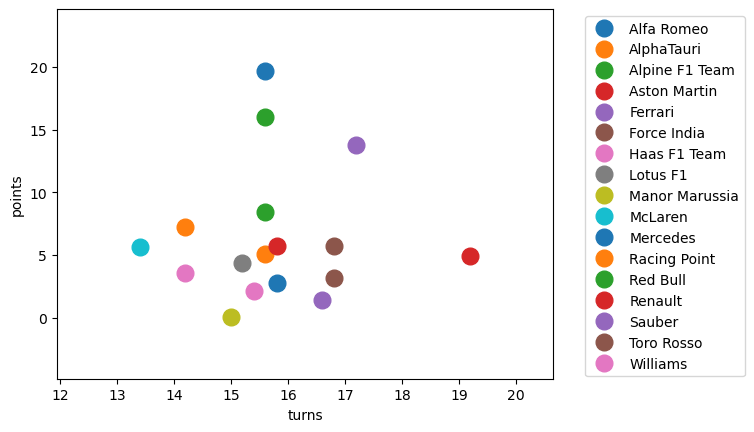

In [97]:
mean_points_turns_groups = mean_points_turns.groupby('Brand')

fig, ax = plt.subplots()
ax.margins(0.25) 
for name, group in mean_points_turns_groups:
    ax.plot(group.mean_turns, group.mean_points, marker='o', linestyle='', ms=12, label=name)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("turns")
plt.ylabel("points")
plt.show()